## Importing Libraries

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',-1)
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

In [231]:
data = pd.read_csv('CREDIT-CARD-SEGMENTATION.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [232]:
df = data.copy()

In [233]:
df.shape

(8950, 18)

In [234]:

df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [235]:
df.drop('CUST_ID',axis=1,inplace=True)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [237]:
df.isnull().sum()

BALANCE                             0  
BALANCE_FREQUENCY                   0  
PURCHASES                           0  
ONEOFF_PURCHASES                    0  
INSTALLMENTS_PURCHASES              0  
CASH_ADVANCE                        0  
PURCHASES_FREQUENCY                 0  
ONEOFF_PURCHASES_FREQUENCY          0  
PURCHASES_INSTALLMENTS_FREQUENCY    0  
CASH_ADVANCE_FREQUENCY              0  
CASH_ADVANCE_TRX                    0  
PURCHASES_TRX                       0  
CREDIT_LIMIT                        1  
PAYMENTS                            0  
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                    0  
TENURE                              0  
dtype: int64

In [238]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [239]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace =True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace =True)

In [240]:
def unique_value(dataframe):
    '''Check the unique value in each column in a dataFrame
    parameter : DataFrame
    return :  A dataFrame contains two columns name of all column of dataframe 
              and unique vale which contain list of unique vale of each column.'''
    col_list = list(dataframe.columns)
    unique_values = [dataframe[col].unique() for col in col_list]
    no_of_unique_value = [dataframe[col].nunique() for col in col_list]
    unique_dataF = pd.DataFrame({'Column Names':col_list,'Unique_values':unique_values,'No. of Unique Values':no_of_unique_value})
    return unique_dataF

In [241]:
unique_value(df)

,Column Names,Unique_values,No. of Unique Values
0,BALANCE,"[40.900749, 3202.467416, 2495.148862, 1666.670542, 817.714335, 1809.8287510000002, 627.260806, 1823.6527429999999, 1014.9264730000001, 152.225975, 1293.124939, 630.794744, 1516.92862, 921.693369, 2772.772734, 6886.213231000001, 2072.074354, 41.089489, 1989.0722280000002, 3577.9709329999996, 2016.6846859999998, 6369.531318, 132.34224, 3800.151377, 5368.5712189999995, 169.781679, 1615.96724, 125.69481699999999, 7152.864372, 22.063489999999998, 12136.219959999999, 1162.273324, 6732.823064, 125.660453, 3517.1016159999995, 1656.350781, 7427.076940999999, 4047.480828, 6269.418144, 1411.60223, 663.44781, 784.889762, 4104.710798, 1360.742377, 5315.945594, 2242.311686, 474.447149, 3910.1112369999996, 229.867179, 863.809833, 4931.331857, 1078.888565, 1565.6810990000001, 464.674156, 6.660517, 1311.995984, 3625.218146, 2386.330629, 3971.1387649999997, 5493.90406, 1879.1140329999998, 1555.793701, 809.582978, 7.152356, 1923.886805, 1758.059987, 809.847455, 1576.3050289999999, 3990.5235789999997, 1699.4354859999999, 5487.683724, 2990.422186, 656.01301, 1808.9724190000002, 532.334517, 5860.433624, 1727.6384489999998, 578.809679, 1205.716678, 6593.820643999999, 17.357563, 81.584711, 3.78631, 42.46443, 1935.362486, 134.917202, 7069.9503859999995, 8181.251131, 4037.3056579999998, 6110.265264, 9381.255094, 1977.0070899999998, 1321.4760800000001, 1307.717841, 2329.485768, 1139.782882, 1619.955708, 3505.671311, 4.708041000000001, 0.0, ...]",8871
1,BALANCE_FREQUENCY,"[0.818182, 0.909091, 1.0, 0.636364, 0.545455, 0.875, 0.454545, 0.727273, 0.5, 0.8888889999999999, 0.090909, 0.272727, 0.363636, 0.0, 0.666667, 0.75, 0.857143, 0.181818, 0.333333, 0.6, 0.3, 0.125, 0.9, 0.833333, 0.8, 0.2, 0.777778, 0.555556, 0.25, 0.14285699999999998, 0.571429, 0.4, 0.44444399999999995, 0.714286, 0.22222199999999998, 0.1, 0.625, 0.428571, 0.11111099999999999, 0.28571399999999997, 0.7, 0.375, 0.166667]",43
2,PURCHASES,"[95.4, 0.0, 773.17, 1499.0, 16.0, 1333.28, 7091.01, 436.2, 861.49, 1281.6, 920.12, 1492.18, 3217.99, 2137.93, 1611.7, 519.0, 504.35, 398.64, 176.68, 6359.95, 815.9, 4248.35, 399.6, 102.0, 233.28, 387.05, 100.0, 3038.01, 1347.71, 324.95, 636.79, 547.28, 2380.55, 204.0, 963.24, 1526.59, 203.82, 1525.44, 437.0, 109.74, 2390.6, 507.5, 901.42, 3107.85, 1979.22, 310.0, 1283.9, 313.27, 5217.62, 229.0, 113.0, 66.2, 840.0, 1887.64, 412.33, 263.5, 1363.69, 419.1, 4523.27, 713.9, 791.94, 561.87, 606.11, 320.0, 388.66, 244.85, 133.05, 396.0, 4915.6, 1247.8, 1603.78, 2258.01, 45.0, 5100.07, 1032.04, 45.65, 405.6, 213.34, 739.44, 79.0, 20.0, 1346.28, 2823.8, 389.96, 808.0, 941.64, 423.7, 4478.75, 1354.86, 2812.2, 1508.9, 1045.57, 2309.78, 495.0, 6724.26, 1174.39, 5580.85, 12462.44, 1957.3, 150.64, ...]",6203
3,ONEOFF_PURCHASES,"[0.0, 773.17, 1499.0, 16.0, 6402.63, 661.49, 1281.6, 1492.18, 2500.23, 419.96, 166.0, 5910.04, 3454.56, 102.0, 204.55, 1013.2, 400.0, 324.95, 636.79, 1642.17, 204.0, 963.24, 786.3, 203.82, 469.8, 97.0, 1402.93, 507.5, 646.07, 2221.74, 1979.22, 1283.9, 313.27, 4789.09, 113.0, 66.2, 840.0, 325.21, 190.6, 1363.69, 1664.09, 503.08, 516.64, 249.5, 606.11, 388.66, 40.21, 28.2, 4515.34, 1247.8, 1445.14, 1318.78, 45.0, 1147.83, 226.9, 45.65, 405.6, 213.34, 739.44, 20.0, 1540.41, 808.0, 177.64, 2721.59, 585.63, 857.12, 1252.36, 667.95, 4100.08, 1174.39, 12462.44, 1077.3, 150.64, 907.0, 351.54, 796.33, 1169.63, 1390.5, 714.52, 9449.07, 720.6, 148.66, 1300.48, 3436.53, 1025.0, 28.65, 164.96, 80.0, 3322.28, 3959.81, 789.53, 3262.25, 5087.31, 295.0, 115.0, 525.64, 4330.53, 1393.5, 7141.38, 4685.54, ...]",4014
4,INSTALLMENTS_PURCHASES,"[95.4, 0.0, 1333.28, 688.38, 436.2, 200.0, 920.12, 717.76, 1717.97, 1611.7, 519.0, 338.35, 398.64, 176.68, 449.91, 815.9, 793.79, 399.6, 233.28, 182.5, 100.0, 2024.81, 947.71, 547.28, 738.38, 740.29, 1055.64, 340.0, 109.74, 987.67, 255.35, 886.11, 310.0, 428.53, 229.0, 1887.64, 87.12, 72.9, 419.1, 2859.18, 210.82, 275.3, 312.37, 320.0, 204.64, 104.85, 396.0, 400.26, 158.

In [242]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    int64  
PURCHASES_TRX                       int64  
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              int64  
dtype: object

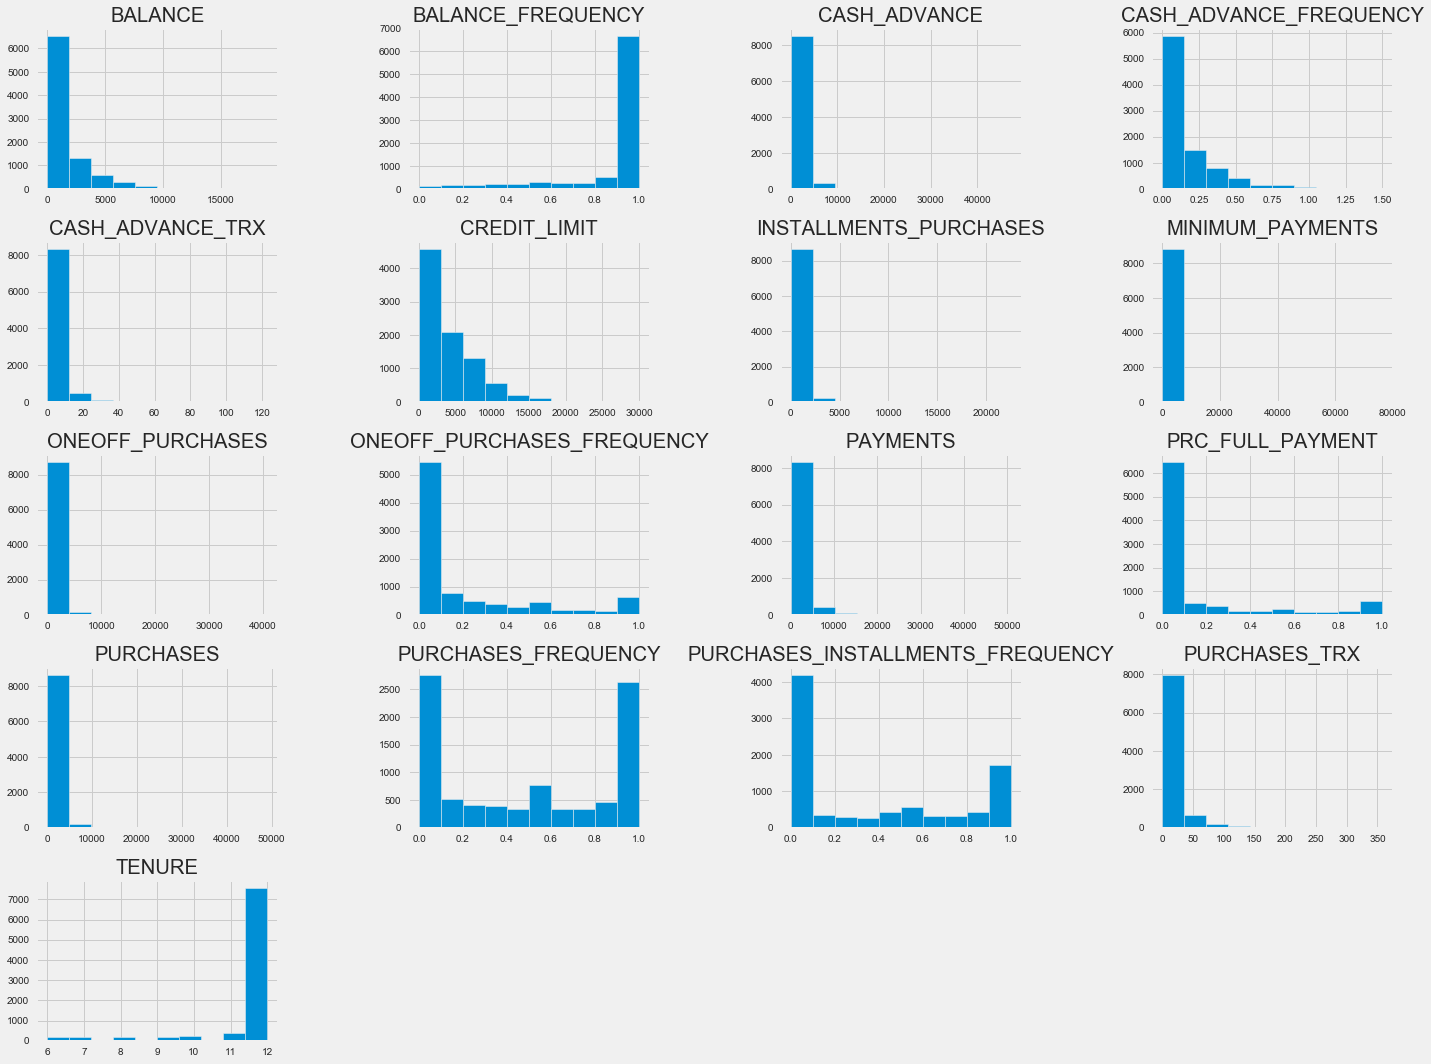

In [243]:
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

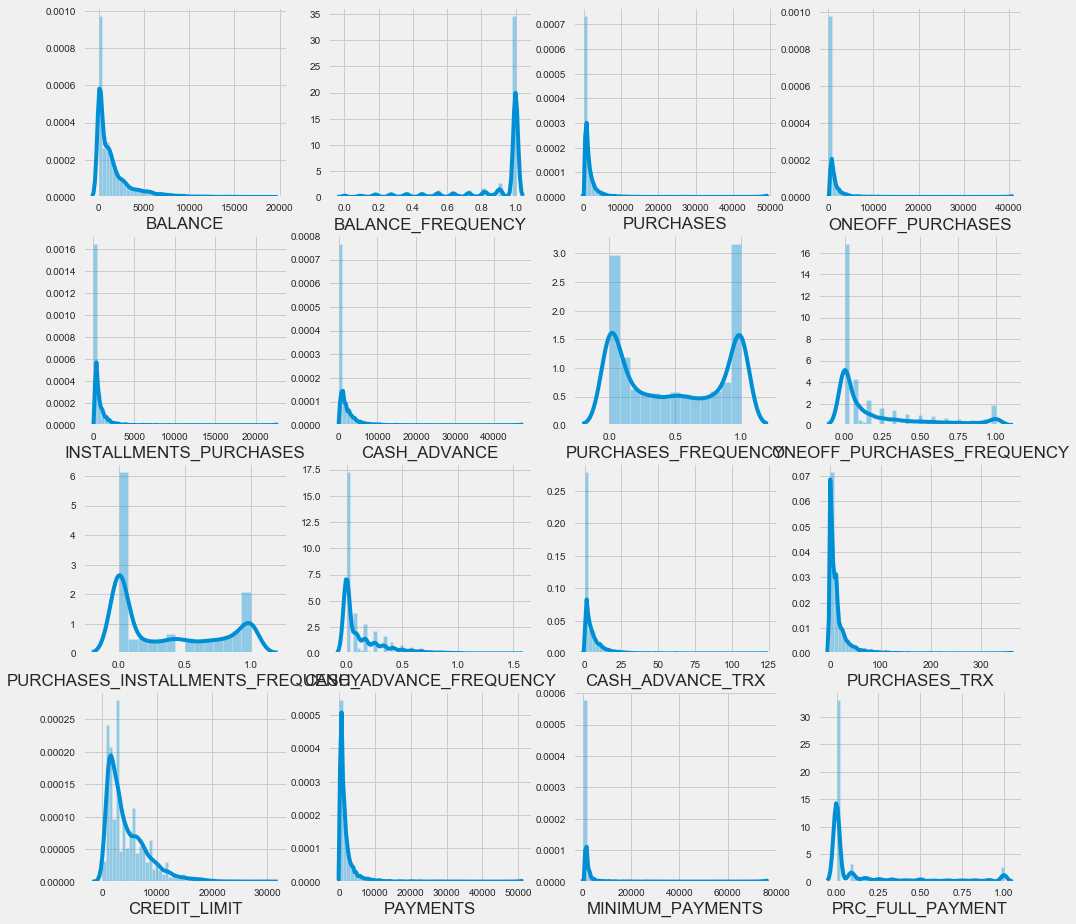

In [244]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        sns.distplot(df[df.columns[4 * i + j]], ax=axs[i,j])
plt.show()

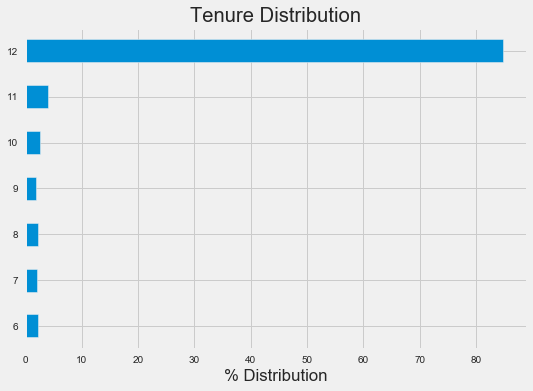

In [245]:
(100*df['TENURE'].value_counts().sort_index()/len(df)).plot(kind='barh')
plt.title('Tenure Distribution')
plt.xlabel('% Distribution')
plt.show()

## Driving new KPI

### Purchases by type (one-off, installments)

In [246]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 17)

In [247]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 17)

In [248]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 17)

In [249]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 17)


As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour


In [250]:
def purchase_type(dataframe):
    if (dataframe['ONEOFF_PURCHASES']==0) & (dataframe['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (dataframe['ONEOFF_PURCHASES']>0) & (dataframe['INSTALLMENTS_PURCHASES']>0):
        return 'both_oneoff_installment'
    if (dataframe['ONEOFF_PURCHASES']>0) & (dataframe['INSTALLMENTS_PURCHASES']==0):
        return 'oneoff_purchase'
    if (dataframe['ONEOFF_PURCHASES']==0) & (dataframe['INSTALLMENTS_PURCHASES']>0):
        return 'installment_purchase'
    

In [251]:
df['PURCHASE_TYPE'] = df.apply(purchase_type,axis=1)

In [252]:
df['PURCHASE_TYPE'].value_counts()

both_oneoff_installment    2774
installment_purchase       2260
none                       2042
oneoff_purchase            1874
Name: PURCHASE_TYPE, dtype: int64

In [253]:
df.shape

(8950, 18)

In [254]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,installment_purchase
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,none
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,oneoff_purchase
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,oneoff_purchase
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,oneoff_purchase


### Average Monthly purchase

In [255]:
df['AVG_MONTHLY_PURCHASE'] = df['PURCHASES']/df['TENURE']
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,AVG_MONTHLY_PURCHASE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,installment_purchase,7.950000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,none,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,oneoff_purchase,64.430833
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,oneoff_purchase,124.916667
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,oneoff_purchase,1.333333


### Monthly_cash_advance Amount

In [256]:
df['MONTHLY_CASH_ADVANCE'] = df['CASH_ADVANCE']/df['TENURE']
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,AVG_MONTHLY_PURCHASE,MONTHLY_CASH_ADVANCE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,installment_purchase,7.950000,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,none,0.000000,536.912124
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,oneoff_purchase,64.430833,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,oneoff_purchase,124.916667,17.149001
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,oneoff_purchase,1.333333,0.000000


### Limit_usage (balance to credit limit ratio ) credit card utilization

In [257]:
df['LIMIT_USAGE'] = df.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'],axis=1)

In [258]:
df['LIMIT_USAGE'].isnull().any()

False

In [259]:
df.shape

(8950, 21)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

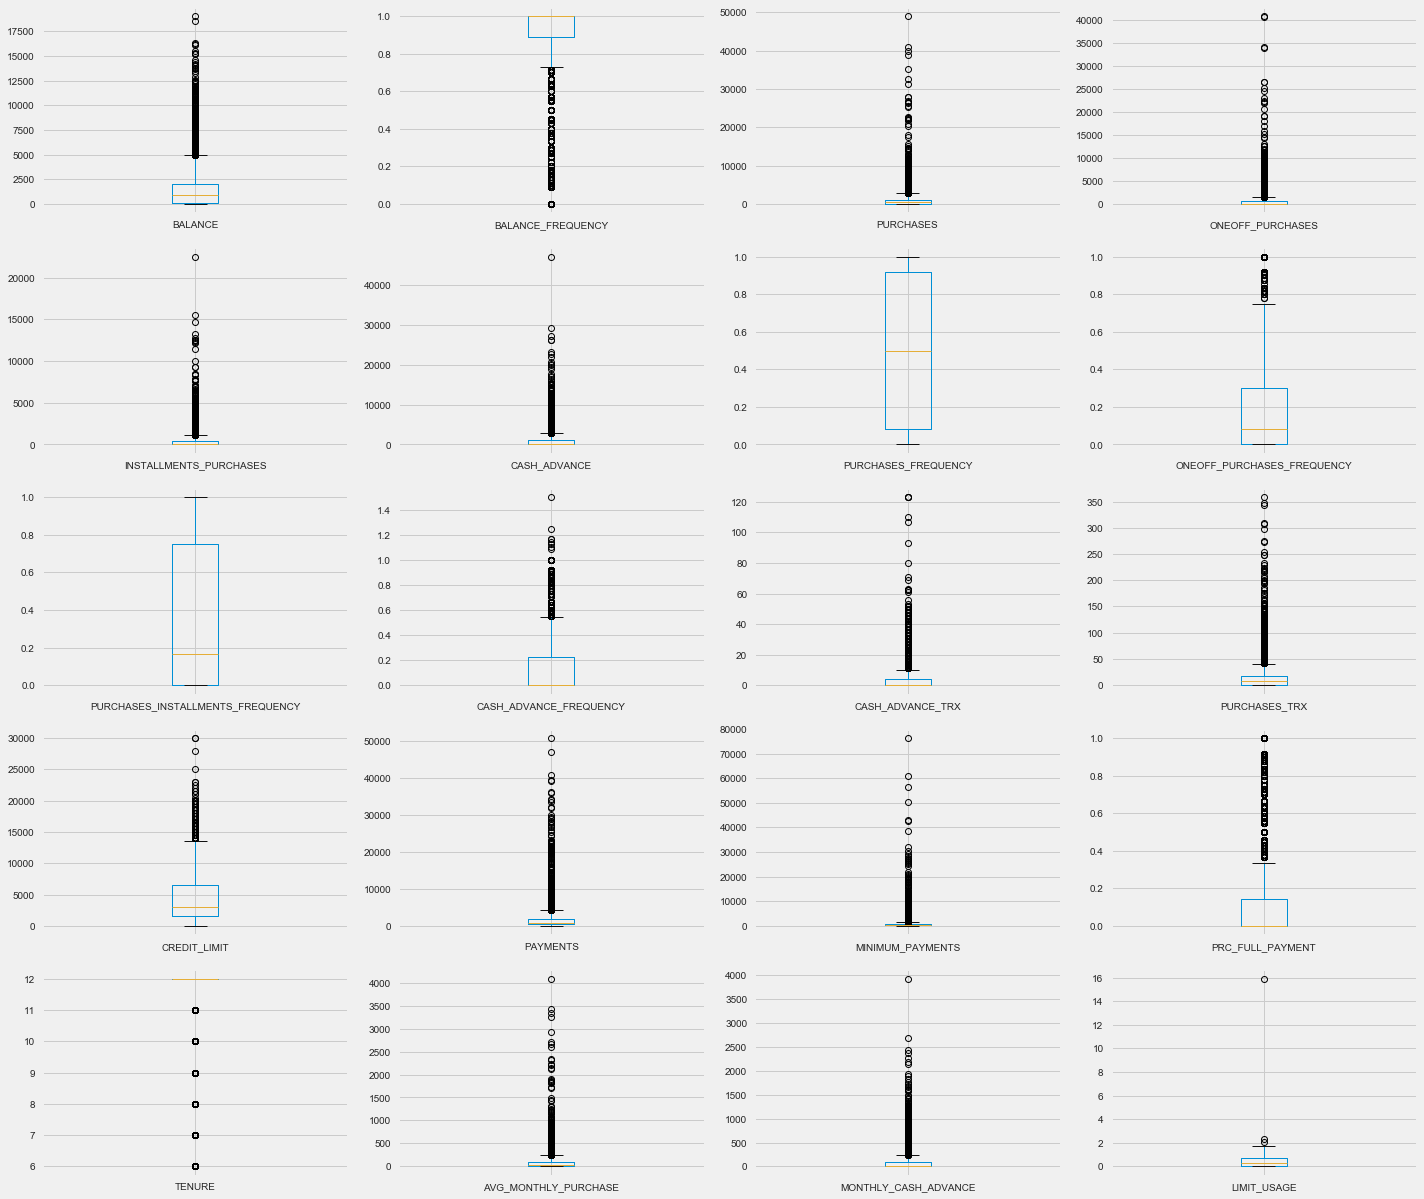

In [261]:
plt.figure(figsize = (20,20))
for i, column in enumerate(df.drop('PURCHASE_TYPE',axis=1).columns,1):
    plt.subplot(6,4,i)
    df[column].plot.box()
    plt.tight_layout()


## Outlier Treatment

In [262]:
def outlier(x):
    lc = x.quantile(0.05)
    uc = x.quantile(0.90)
    return x.clip(lower = lc, upper = uc)

In [263]:
df1 = df.drop('PURCHASE_TYPE',axis=1).apply(lambda x: outlier(x))

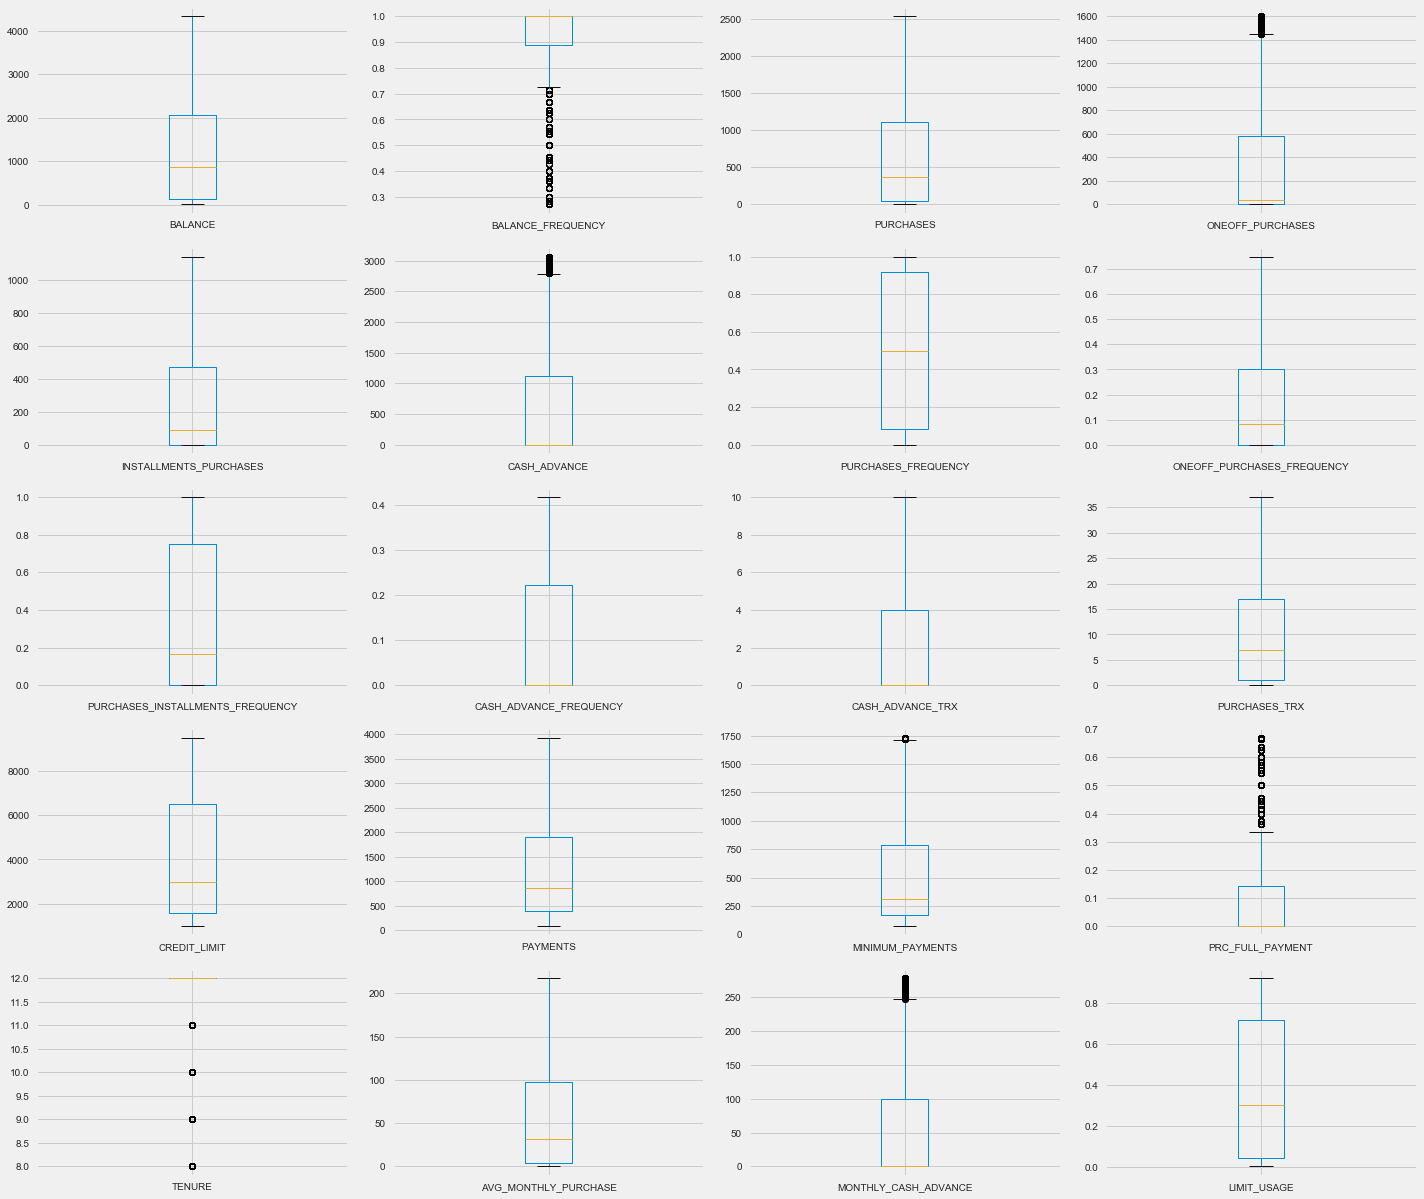

In [264]:
plt.figure(figsize = (20,20))
for i, column in enumerate(df1.columns,1):
    plt.subplot(6,4,i)
    df1[column].plot.box()
    plt.tight_layout()

In [265]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVG_MONTHLY_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1337.633083,0.883252,720.742394,371.062415,292.432773,702.474723,0.490351,0.184773,0.364437,0.115635,2.383128,11.246592,4193.063976,1326.123876,559.904876,0.128702,11.584134,62.295503,63.026710,0.380472
std,1419.968616,0.218438,843.367276,548.305044,389.349598,1063.547283,0.401371,0.255668,0.397448,0.149422,3.417878,12.219803,2844.274296,1216.951546,534.297218,0.227700,1.097348,72.267176,96.035417,0.340939
min,8.814518,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,89.988924,74.644117,0.000000,8.000000,0.000000,0.000000,0.002943
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571
max,4338.563657,1.000000,2542.624000,1600.099000,1140.070000,3065.534560,1.000000,0.750000,1.000000,0.416667,10.000000,37.000000,9500.000000,3923.906642,1731.689977,0.670000,12.000000,217.353917,278.058470,0.919888


In [266]:
df = pd.concat([df1,df['PURCHASE_TYPE']],axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVG_MONTHLY_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,PURCHASE_TYPE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,installment_purchase
1,3202.467416,0.909091,0.00,0.00,0.00,3065.534560,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,3923.906642,1072.340217,0.222222,12,0.000000,278.058470,0.457495,none
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,oneoff_purchase
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,89.988924,312.343947,0.000000,12,124.916667,17.149001,0.222223,oneoff_purchase
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,oneoff_purchase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,74.644117,0.500000,8,48.520000,0.000000,0.028494,installment_purchase
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,8,50.000000,0.000000,0.019183,installment_purchase
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,89.988924,82.418369,0.250000,8,24.066667,0.000000,0.023399,installment_purchase
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,1000.0,89.988924,74.644117,0.250000,8,0.000000,6.093130,0.026915,none


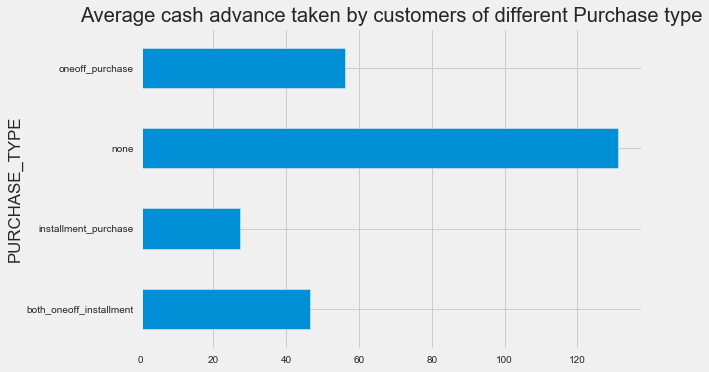

In [267]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_CASH_ADVANCE'])).plot.barh()
plt.title('Average cash advance taken by customers of different Purchase type')
plt.show()


Customers who don't do either one-off or installment purchases take more cash on advance

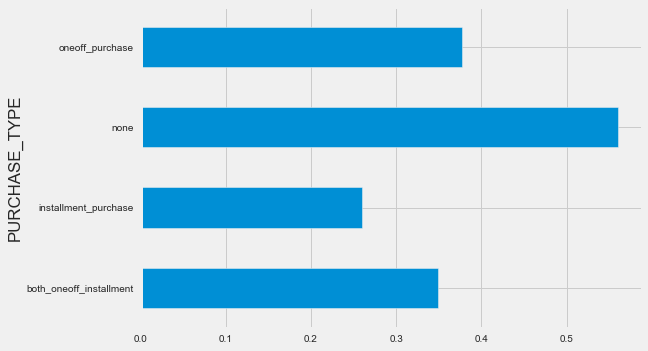

In [268]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['LIMIT_USAGE'])).plot.barh()
plt.show()

 customers whom did not purcahse have higher Average limit usage and maintain their balance properly and customer with installment purchase did not maintain their avg. limit usage rather than others

In [269]:

df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'AVG_MONTHLY_PURCHASE', 'MONTHLY_CASH_ADVANCE', 'LIMIT_USAGE',
       'PURCHASE_TYPE'],
      dtype='object')

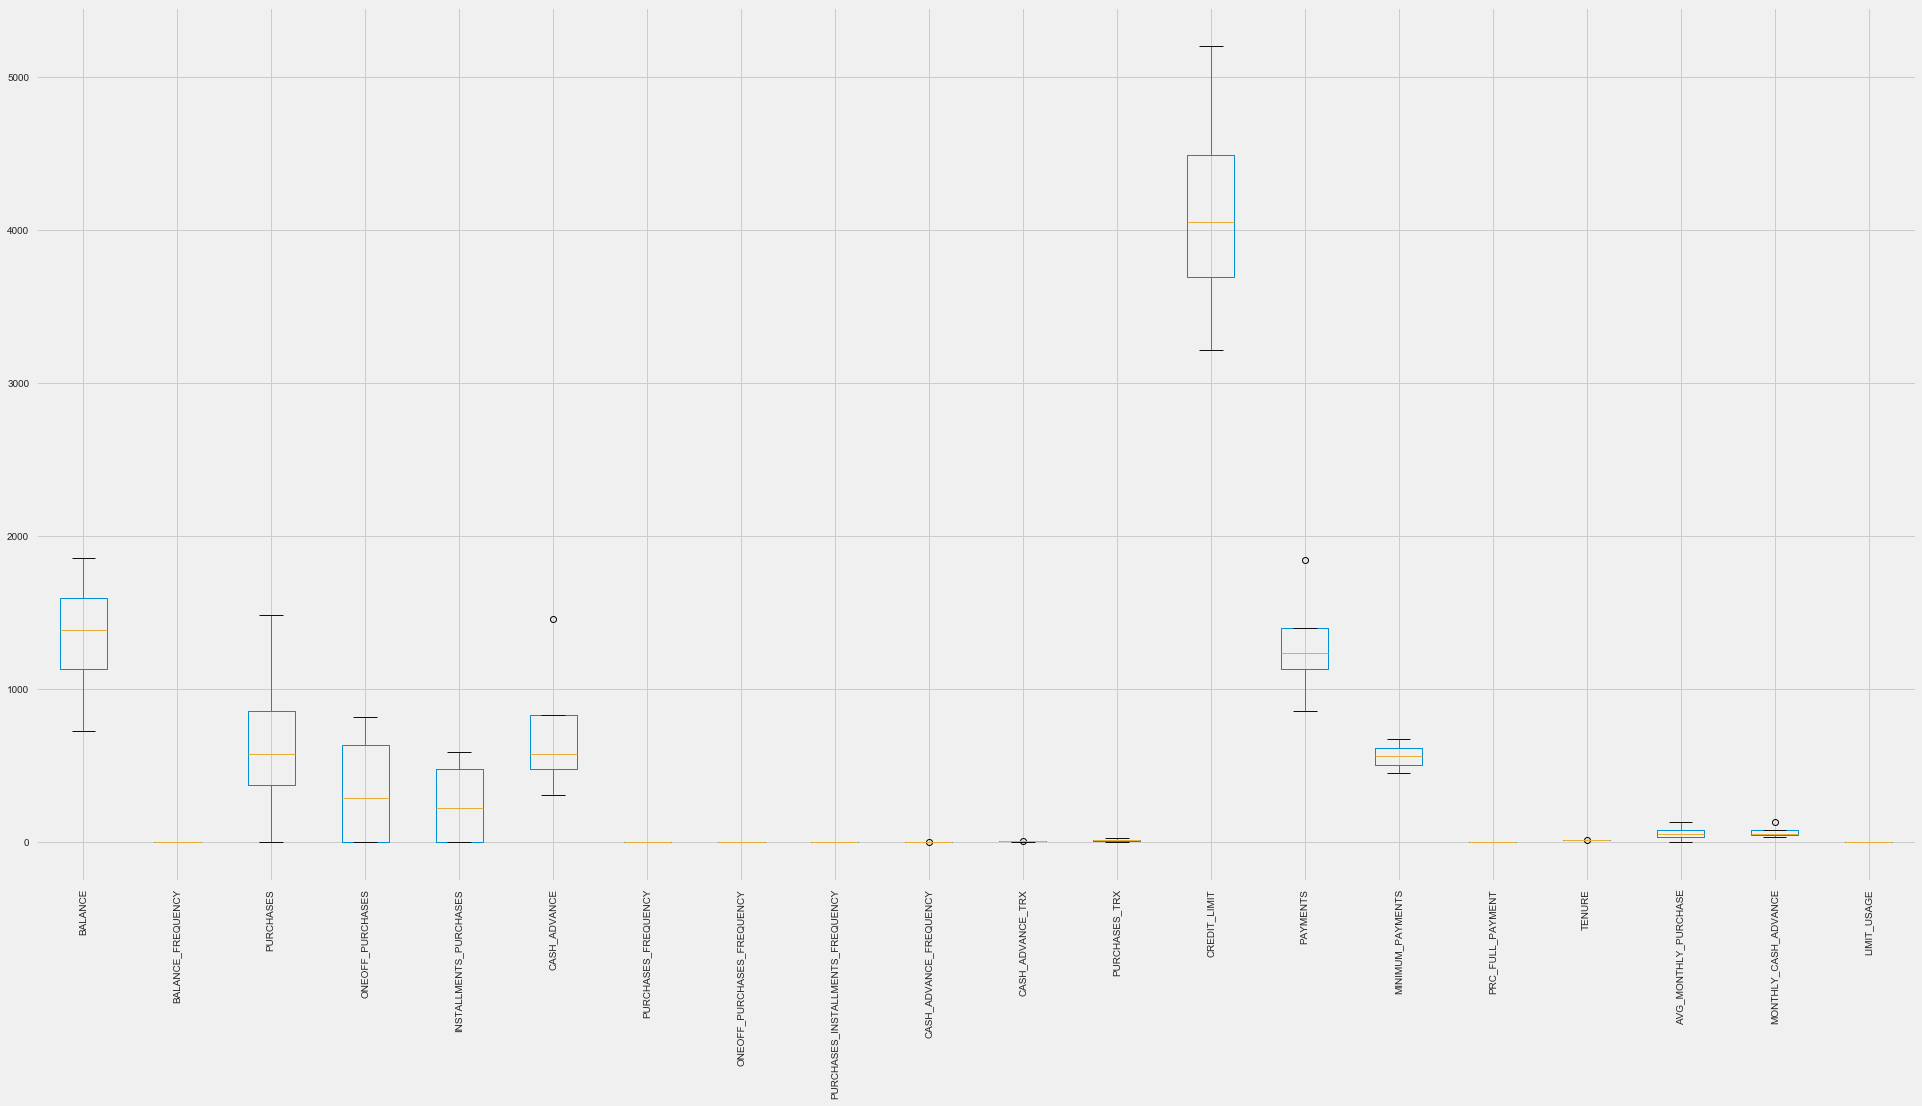

In [270]:
df.groupby('PURCHASE_TYPE').mean().plot.box(figsize =(30,15))
plt.xticks(rotation=90)
plt.show()

## Preparing data

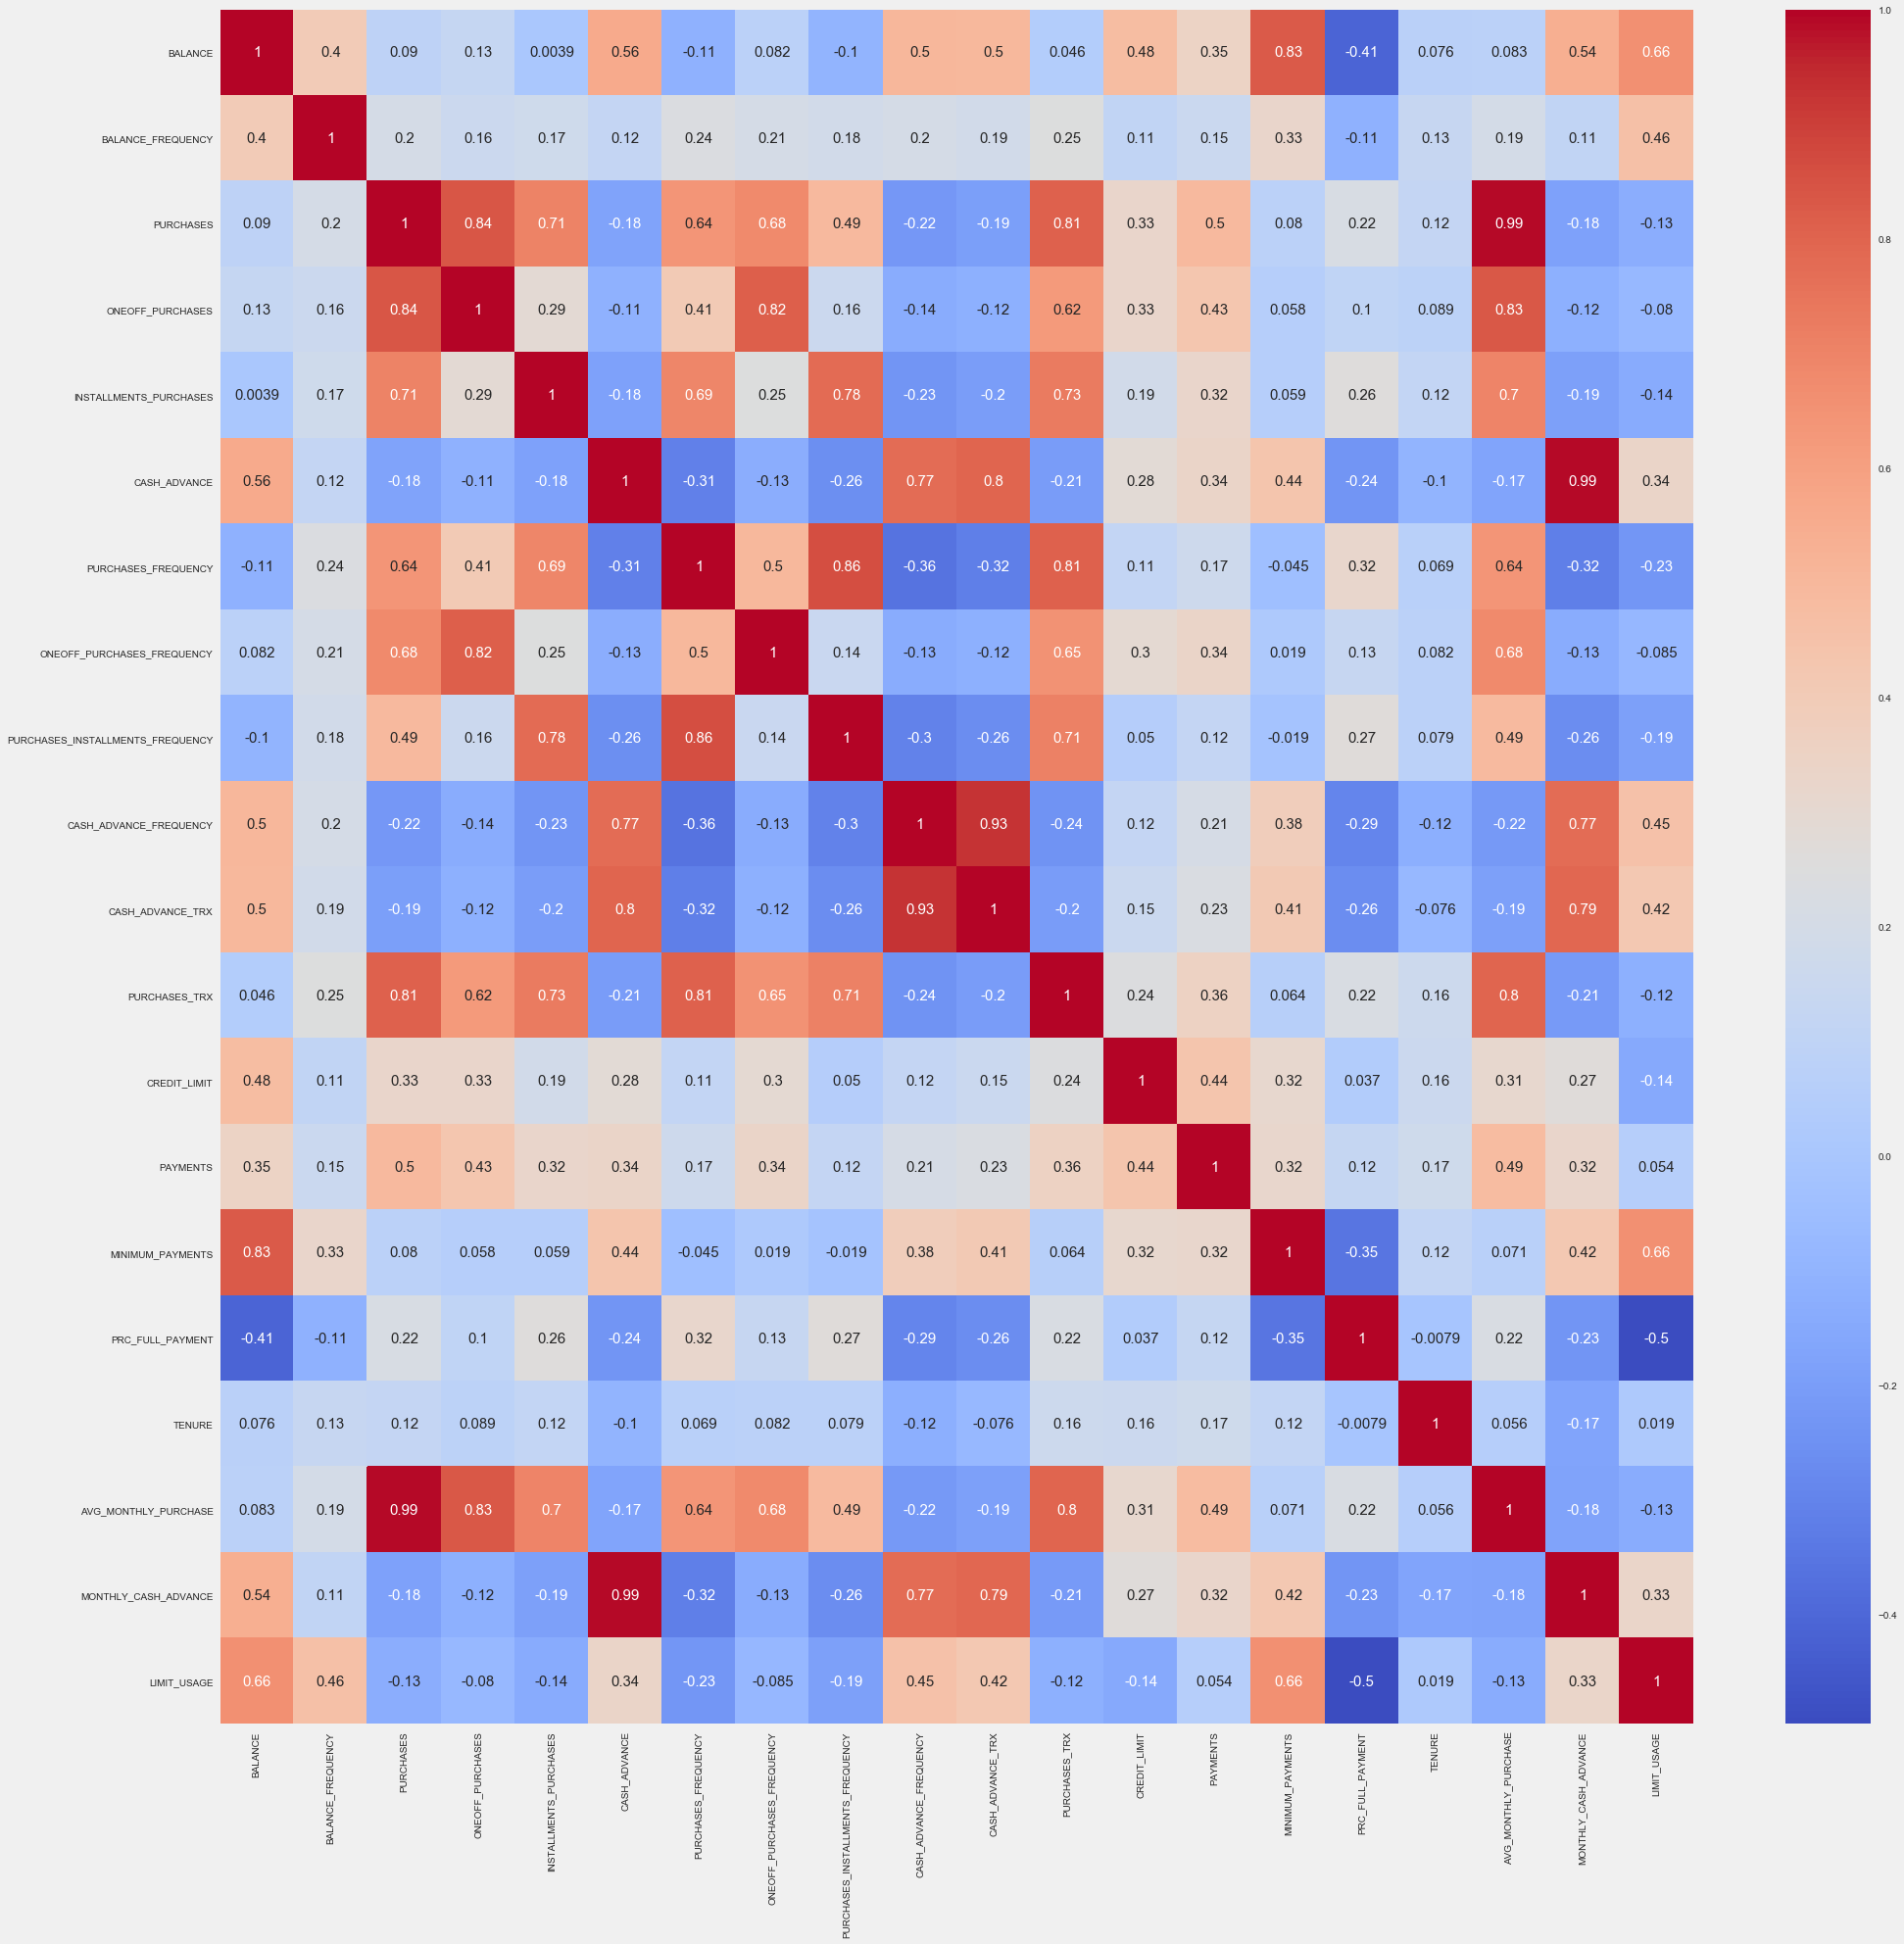

In [271]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"size":15})
plt.show()

Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data 

## Converting categorical column into numeric

In [272]:
df1 =pd.get_dummies(df['PURCHASE_TYPE'])

In [273]:
df.drop('PURCHASE_TYPE',axis=1,inplace=True)


In [274]:
df = pd.concat([df,df1],axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVG_MONTHLY_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,both_oneoff_installment,installment_purchase,none,oneoff_purchase
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,3065.534560,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,3923.906642,1072.340217,0.222222,12,0.000000,278.058470,0.457495,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,89.988924,312.343947,0.000000,12,124.916667,17.149001,0.222223,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,0,0,0,1


In [275]:
df.shape

(8950, 24)

## Feature scaling

In [276]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
df_scaled= sc.fit_transform(df)

In [277]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVG_MONTHLY_PURCHASE,MONTHLY_CASH_ADVANCE,LIMIT_USAGE,both_oneoff_installment,installment_purchase,none,oneoff_purchase
0,-0.913263,-0.297904,-0.741524,-0.676782,-0.506084,-0.660539,-0.806490,-0.722749,-0.707313,-0.773925,-0.697293,-0.756731,-1.122691,-0.923935,-0.786863,-0.565256,0.378995,-0.752050,-0.656323,-0.996042,-0.670193,1.720516,-0.543690,-0.514625
1,1.313366,0.118296,-0.854649,-0.676782,-0.751122,2.221990,-1.221758,-0.722749,-0.916995,0.899287,0.473089,-0.920409,0.986928,2.134783,0.959137,0.410741,0.378995,-0.862065,2.239213,0.225929,-0.670193,-0.581221,1.839282,-0.514625
2,0.815216,0.534496,0.062168,0.733406,-0.751122,-0.660539,1.269843,2.210909,-0.916995,-0.773925,-0.697293,0.061658,1.162729,-0.578574,0.126116,-0.565256,0.378995,0.029549,-0.656323,-0.140165,-0.670193,-0.581221,-0.543690,1.943162
3,0.231735,-1.130304,0.922850,2.057250,-0.751122,-0.467036,-1.014125,-0.396788,-0.916995,-0.216190,-0.404697,-0.838570,1.162729,-1.015820,-0.463365,-0.565256,0.378995,0.866571,-0.477743,-0.464182,-0.670193,-0.581221,-0.543690,1.943162
4,-0.366169,0.534496,-0.835676,-0.647600,-0.751122,-0.660539,-1.014125,-0.396788,-0.916995,-0.773925,-0.697293,-0.838570,-1.052371,-0.532335,-0.589805,-0.565256,0.378995,-0.843614,-0.656323,0.882779,-0.670193,-0.581221,-0.543690,1.943162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.922001,0.534496,-0.509442,-0.676782,-0.003372,-0.660539,1.269843,-0.722749,1.179833,-0.773925,-0.697293,-0.429376,-1.122691,-0.822206,-0.908273,1.630739,-3.266360,-0.190630,-0.656323,-1.032435,-0.670193,1.720516,-0.543690,-0.514625
8946,-0.928558,0.534496,-0.498912,-0.676782,0.019437,-0.660539,1.269843,-0.722749,1.179833,-0.773925,-0.697293,-0.429376,-1.122691,-0.863076,-0.463365,-0.565256,-3.266360,-0.170149,-0.656323,-1.059745,-0.670193,1.720516,-0.543690,-0.514625
8947,-0.925589,-0.228539,-0.683421,-0.676782,-0.380227,-0.660539,0.854576,-0.722749,0.760469,-0.773925,-0.697293,-0.511215,-1.122691,-1.015820,-0.893722,0.532741,-3.266360,-0.529023,-0.656323,-1.047380,-0.670193,1.720516,-0.543690,-0.514625
8948,-0.932591,-0.228539,-0.854649,-0.676782,-0.751122,-0.626162,-1.221758,-0.722749,-0.916995,0.341552,-0.112102,-0.920409,-1.122691,-1.015820,-0.908273,0.532741,-3.266360,-0.862065,-0.592873,-1.037065,-0.670193,-0.581221,1.839282,-0.514625


In [278]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=10, random_state=0)
transformer.fit(df_scaled)


FactorAnalysis(n_components=10)

In [279]:
components_df=pd.DataFrame(transformer.components_)
for i in range(len(df_scaled.columns)):
    components_df.rename(columns={i:df_scaled.columns[i]},inplace=True)

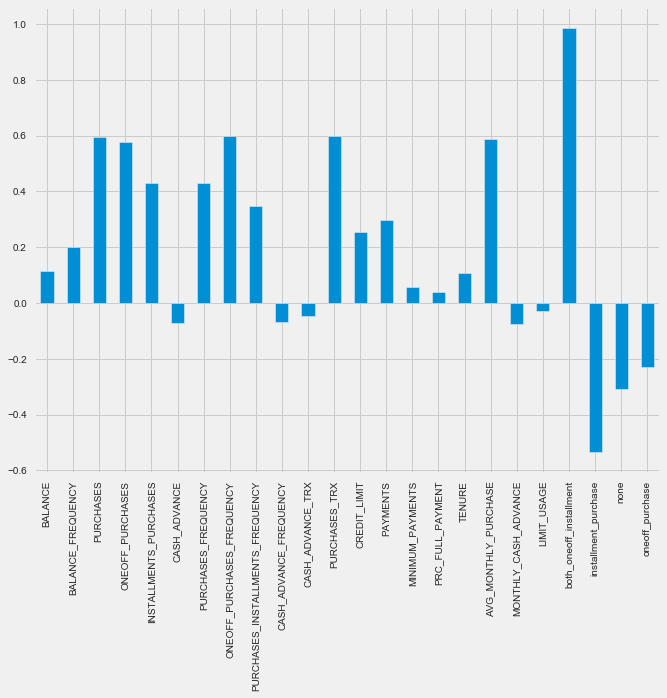

In [280]:
plt.figure(figsize=(10,8))
components_df.loc[0].plot(kind="bar")
plt.grid(True)

In [281]:
components_df.loc[0].sort_values()

installment_purchase               -0.535187
none                               -0.309679
oneoff_purchase                    -0.229378
MONTHLY_CASH_ADVANCE               -0.077252
CASH_ADVANCE                       -0.071475
CASH_ADVANCE_FREQUENCY             -0.069040
CASH_ADVANCE_TRX                   -0.046962
LIMIT_USAGE                        -0.027778
PRC_FULL_PAYMENT                    0.039864
MINIMUM_PAYMENTS                    0.058354
TENURE                              0.106840
BALANCE                             0.113457
BALANCE_FREQUENCY                   0.199254
CREDIT_LIMIT                        0.254910
PAYMENTS                            0.298851
PURCHASES_INSTALLMENTS_FREQUENCY    0.347817
INSTALLMENTS_PURCHASES              0.429213
PURCHASES_FREQUENCY                 0.430373
ONEOFF_PURCHASES                    0.578094
AVG_MONTHLY_PURCHASE                0.587411
PURCHASES                           0.593838
PURCHASES_TRX                       0.597238
ONEOFF_PUR

##### Features to be included in our clustering model will be selected based on components with max variance!
* PAYMENTS                            
* PURCHASES_INSTALLMENTS_FREQUENCY    
* INSTALLMENTS_PURCHASES              
* PURCHASES_FREQUENCY                 
* ONEOFF_PURCHASES                    
* AVG_MONTHLY_PURCHASE                
* PURCHASES                           
* PURCHASES_TRX                       
* ONEOFF_PURCHASES_FREQUENCY         
* both_oneoff_installment
* installment_purchase               
* none                               
* oneoff_purchase                    



In [282]:
cluster_df = df_scaled[['PAYMENTS','PURCHASES_INSTALLMENTS_FREQUENCY','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY',
                        'ONEOFF_PURCHASES','AVG_MONTHLY_PURCHASE','PURCHASES','PURCHASES_TRX','ONEOFF_PURCHASES_FREQUENCY',
                        'both_oneoff_installment','installment_purchase','none','oneoff_purchase']]
cluster_df.head()

,PAYMENTS,PURCHASES_INSTALLMENTS_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES,AVG_MONTHLY_PURCHASE,PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY,both_oneoff_installment,installment_purchase,none,oneoff_purchase
0,-0.923935,-0.707313,-0.506084,-0.806490,-0.676782,-0.752050,-0.741524,-0.756731,-0.722749,-0.670193,1.720516,-0.543690,-0.514625
1,2.134783,-0.916995,-0.751122,-1.221758,-0.676782,-0.862065,-0.854649,-0.920409,-0.722749,-0.670193,-0.581221,1.839282,-0.514625
2,-0.578574,-0.916995,-0.751122,1.269843,0.733406,0.029549,0.062168,0.061658,2.210909,-0.670193,-0.581221,-0.543690,1.943162
3,-1.015820,-0.916995,-0.751122,-1.014125,2.057250,0.866571,0.922850,-0.838570,-0.396788,-0.670193,-0.581221,-0.543690,1.943162
4,-0.532335,-0.916995,-0.751122,-1.014125,-0.647600,-0.843614,-0.835676,-0.838570,-0.396788,-0.670193,-0.581221,-0.543690,1.943162


In [283]:
cluster_df.shape

(8950, 13)

In [284]:
from sklearn.cluster import KMeans
cluster_error = []
for cluster in range(1,15):
    km = KMeans(n_clusters= cluster)
    km.fit(cluster_df)
    cluster_error.append(km.inertia_)
    
cluster_df2 = pd.DataFrame({'Cluster':range(1,15),'error':cluster_error})
cluster_df2

,Cluster,error
0,1,116350.000000
1,2,73677.790286
2,3,54171.344166
3,4,40511.065319
4,5,31578.416235
5,6,27579.480510
6,7,24199.390952
7,8,22072.231290
8,9,20105.906362
9,10,18515.834079


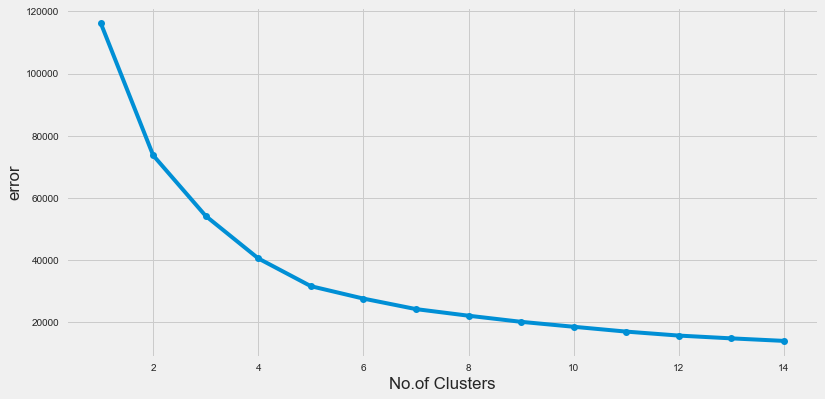

In [285]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df2['Cluster'], cluster_df2['error'], marker = "o" )
plt.xlabel('No.of Clusters')
plt.ylabel('error')
plt.show()

#### From above graph we will find elbow range. here it is 4,5,6,7

In [286]:
from sklearn import metrics
k_range = range(2, 15)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_df)
    scores.append(metrics.silhouette_score(cluster_df, km.labels_))

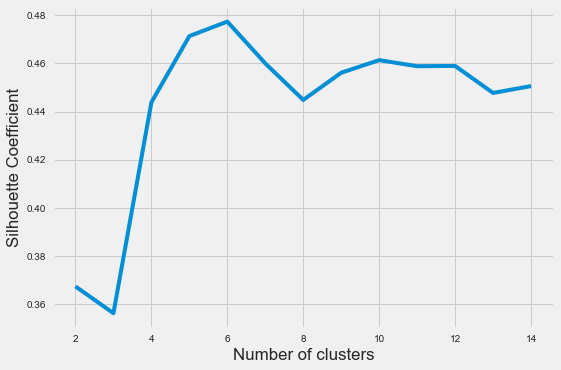

In [287]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [292]:
from sklearn.cluster import KMeans
kmean_6 = KMeans(n_clusters = 6, random_state = 42)
cluster_df['Cluster'] = kmean_6.fit_predict(cluster_df)

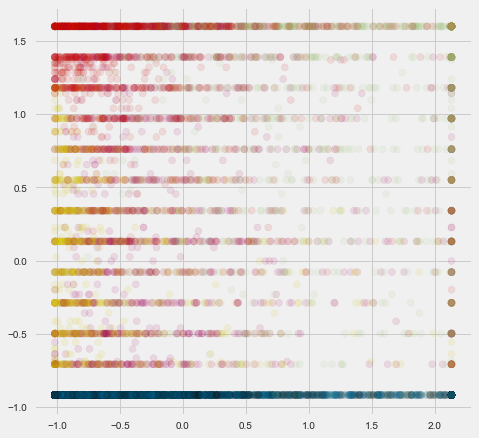

In [293]:
color_map={0:'r',1:'b',2:'g',3:'k',4:'m',5:'y'}
label_color=[color_map[l] for l in kmean_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(cluster_df.iloc[:,0],cluster_df.iloc[:,1],c=label_color,cmap='Spectral',alpha=0.1)
plt.show()

In [305]:
cluster_df['Cluster'].value_counts(normalize =True)

1    0.228156
3    0.200447
4    0.162905
2    0.157542
0    0.142235
5    0.108715
Name: Cluster, dtype: float64

<h6>Key performace variable selection:</h6> Here i am taking varibales which we will use in derving new KPI. 
We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables

In [295]:
col_kpi=['AVG_MONTHLY_PURCHASE','PURCHASES','PURCHASES_TRX','MONTHLY_CASH_ADVANCE','CASH_ADVANCE_TRX','CASH_ADVANCE',
         'both_oneoff_installment','installment_purchase','none','oneoff_purchase','CREDIT_LIMIT','LIMIT_USAGE']

In [300]:
cluster_df2=pd.concat([df[col_kpi],pd.Series(kmean_6.labels_,name='Cluster')],axis=1)

In [301]:
cluster_df2.head()

,AVG_MONTHLY_PURCHASE,PURCHASES,PURCHASES_TRX,MONTHLY_CASH_ADVANCE,CASH_ADVANCE_TRX,CASH_ADVANCE,both_oneoff_installment,installment_purchase,none,oneoff_purchase,CREDIT_LIMIT,LIMIT_USAGE,Cluster
0,7.950000,95.40,2,0.000000,0,0.000000,0,1,0,0,1000.0,0.040901,5
1,0.000000,0.00,0,278.058470,4,3065.534560,0,0,1,0,7000.0,0.457495,1
2,64.430833,773.17,12,0.000000,0,0.000000,0,0,0,1,7500.0,0.332687,3
3,124.916667,1499.00,1,17.149001,1,205.788017,0,0,0,1,7500.0,0.222223,3
4,1.333333,16.00,1,0.000000,0,0.000000,0,0,0,1,1200.0,0.681429,3


In [302]:
cluster_5=cluster_df2.groupby('Cluster').apply(lambda x: x[col_kpi].mean()).T
cluster_5

Cluster,0,1,2,3,4,5
AVG_MONTHLY_PURCHASE,62.420348,0.000000,195.688912,49.777202,66.216239,16.771536
PURCHASES,711.905832,0.000000,2297.809831,560.684071,764.024342,189.785951
PURCHASES_TRX,15.202671,0.001469,31.842553,5.477146,14.761317,5.195272
MONTHLY_CASH_ADVANCE,25.868487,131.151368,44.060489,57.521896,47.677766,29.304857
CASH_ADVANCE_TRX,0.897093,4.756611,1.691489,2.243032,2.101509,1.028777
CASH_ADVANCE,285.316006,1453.244184,505.921203,637.230170,537.409789,325.111594
both_oneoff_installment,0.000000,0.000000,0.933333,0.000000,1.000000,0.000000
installment_purchase,1.000000,0.000000,0.009929,0.000000,0.000000,1.000000
none,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
oneoff_purchase,0.000000,0.000000,0.056738,1.000000,0.000000,0.000000


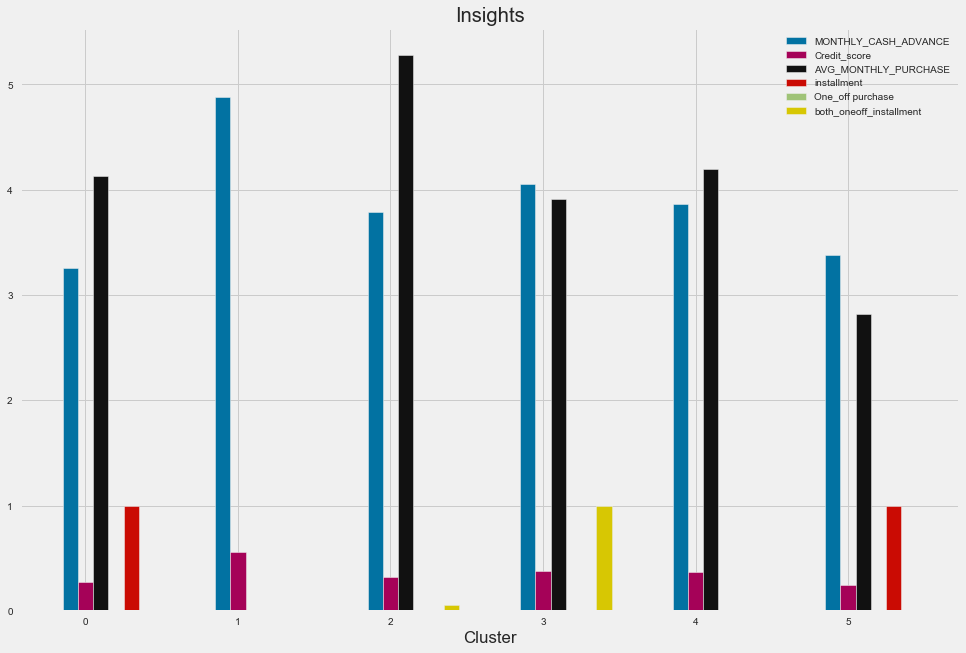

In [304]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['MONTHLY_CASH_ADVANCE',:].values)
credit_score=(cluster_5.loc['LIMIT_USAGE',:].values)
purchase= np.log(cluster_5.loc['AVG_MONTHLY_PURCHASE',:].values)
installment=cluster_5.loc['installment_purchase',:].values
one_off=cluster_5.loc['oneoff_purchase',:].values
both = cluster_5.loc['both_oneoff_installment',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='MONTHLY_CASH_ADVANCE',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='AVG_MONTHLY_PURCHASE',width=bar_width)
b4=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b5=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='y',label='both_oneoff_installment',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('0', '1', '2', '3','4','5'))
plt.legend()
plt.show()

## Insights

Clusters are clearly distinguishing behavior within customers

   * Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. This group is about 16% of the total customer base

   * cluster 1 is taking maximum advance_cash and is credit_score & doing no purchase transaction. This group is about 23% of the total customer base

   * Cluster 0 customers are doing maximum installment tranctions doing second highest monthely purchase. This group is about 14% of the total customer base

   * Cluster 3 customers have maximum both on-off and installment purchase. This group is about 20% of the total customer base.
   
   * Cluster 5 customers have maximum installment purchase. This groups about 20% of total customer base 
